In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#distance
import gower

# 
import importlib
import utils
importlib.reload(utils)
import preprocessing
importlib.reload(preprocessing)

# preprocessing tools
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# clustering
from sklearn.cluster import DBSCAN

# methods to remove
from sklearn.ensemble import IsolationForest

sns.set_palette('Set2')

In [58]:
df = preprocessing.load_dataset(categ= False, scaler=False)
distance_matrix = gower.gower_matrix(df)

In [85]:
epsilons = np.arange(0.01, 0.05, 0.002)
min_samples_s = np.arange(3, 90, 3)
num_clusters = np.zeros((len(epsilons), len(min_samples_s)), dtype=int)  # Matrix to store the number of clusters

for i, epsilon in enumerate(epsilons):
    for j, min_samples in enumerate(min_samples_s):
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='precomputed')
        labels = dbscan.fit_predict(distance_matrix)
        num_clusters[i, j] = len(np.unique(labels))

In [86]:
df_clusters = pd.DataFrame(num_clusters, columns=min_samples_s, index=epsilons)
df_clusters

,1,4,7,10,13,16,19,22,25,28,...,61,64,67,70,73,76,79,82,85,88
0.010,558,48,28,27,21,18,15,15,13,12,...,7,6,6,4,4,4,4,4,4,4
0.012,420,51,35,27,23,23,20,16,15,14,...,10,9,8,7,7,7,7,6,6,6
0.014,318,50,37,27,24,23,22,20,17,16,...,10,10,10,10,10,9,9,9,7,7
0.016,260,55,38,31,25,25,23,22,21,19,...,12,10,10,10,10,10,10,10,9,9
0.018,215,57,42,36,26,25,23,23,21,21,...,12,12,12,11,10,10,10,10,10,10
0.020,191,60,42,37,28,25,25,23,23,22,...,13,12,12,12,11,11,10,10,10,10
0.022,178,63,44,37,32,25,25,24,23,23,...,13,13,12,12,12,11,11,11,11,10
0.024,171,63,47,38,33,25,25,24,23,23,...,13,13,13,13,13,11,11,11,11,11
0.026,163,63,47,38,34,27,25,24,23,23,...,13,13,13,13,13,12,11,11,11,11
0.028,159,62,46,39,34,27,26,25,23,23,...,13,13,13,13,13,13,11,11,11,11


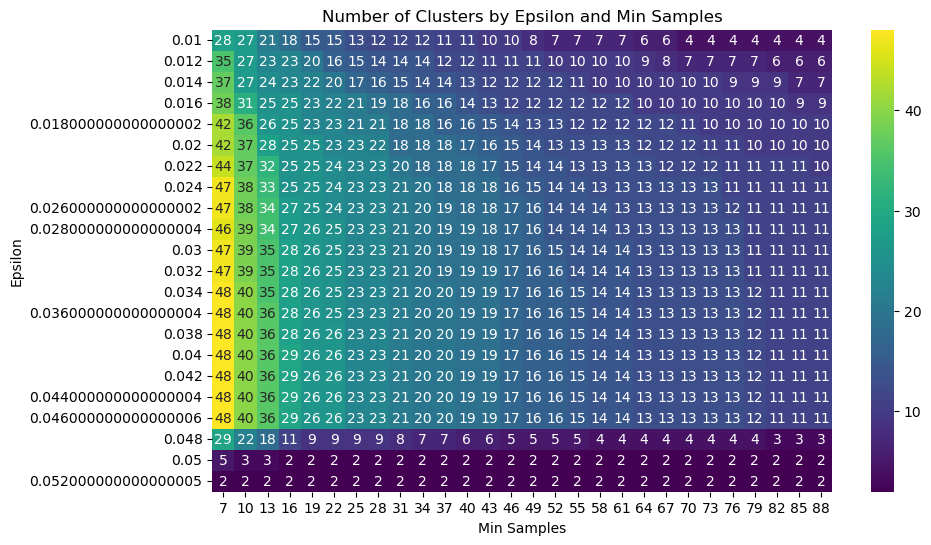

In [89]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clusters.iloc[:,2:], cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Number of Clusters by Epsilon and Min Samples')
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.show()

In [94]:
dbscan = DBSCAN(eps=0.04, min_samples= 25, metric='precomputed')
labels = dbscan.fit_predict(distance_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.000s...
[t-SNE] Computed neighbors for 7200 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.035785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.327164
[t-SNE] KL divergence after 1000 iterations: 0.905709


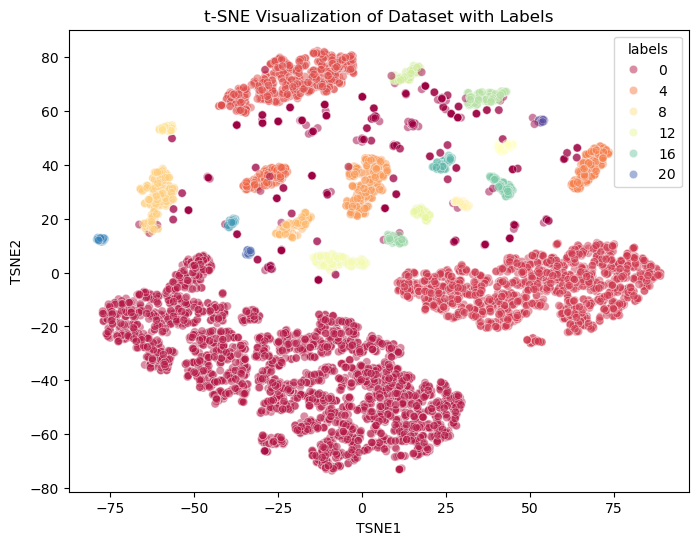

In [95]:
utils.plot_TSNE(df , labels)